In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config, get_file_avg

In [152]:
file_path = '../output/rerun/'
files = sorted(os.listdir(file_path))

cfg = get_config('../cfg/rerun_exp_cfg.json')

criticality_prob_list = cfg['critical_prob_list']

orig = [0.0] * len(criticality_prob_list)
wo_drop = [0.0] * len(criticality_prob_list)
ours = [0.0] * len(criticality_prob_list)

In [153]:
for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    core_orig, core_wo_drop, core_ours = get_file_avg(file_path + file)
    index = criticality_prob_list.index(float(params['critical_prob']))

    orig[index] += core_orig
    wo_drop[index] += core_wo_drop
    ours[index] += core_ours

In [154]:
print(orig)
print(wo_drop)
print(ours)

[12.89, 12.1, 12.4, 12.43, 12.01, 11.99, 12.25, 12.15, 12.25, 12.42, 12.56]
[5.98, 7.46, 9.18, 10.65, 11.44, 11.98, 13.25, 13.03, 13.14, 13.58, 12.56]
[5.98, 5.56, 5.98, 6.17, 6.29, 6.91, 7.7, 8.51, 9.64, 11.32, 12.56]


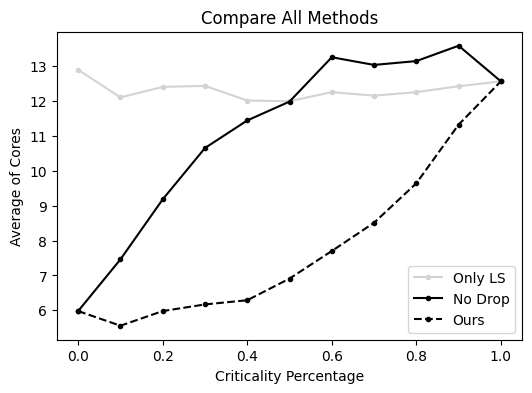

In [155]:
plt.figure(figsize=(6,4))

ax = plt.gca() 

plt.plot(criticality_prob_list, orig, label='Only LS', color='lightgray', marker='.')
plt.plot(criticality_prob_list, wo_drop, label='No Drop', color='black', marker='.')
plt.plot(criticality_prob_list, ours, label='Ours', color='black', linestyle='dashed', marker='.')

plt.title('Compare All Methods')
plt.xlabel('Criticality Percentage')
plt.ylabel('Average of Cores')
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.legend()
plt.show()